### **Call Center Dataset Analysis with Python**

In [121]:
#connect drive with colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
#change path directory
%cd /content/drive/MyDrive/Intern

/content/drive/MyDrive/Intern


In [123]:
#call pandas library
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Intern/01 Call-Center-Dataset.csv', encoding='latin-1')

In [124]:
df #print data frame (csv file)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0002,Becky,01-01-2021,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
1,ID0005,Becky,01-01-2021,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
2,ID0015,Becky,01-01-2021,11:55:41,Admin Support,Y,Y,48.0,00:03:47,4.0
3,ID0016,Becky,01-01-2021,11:55:41,Admin Support,Y,Y,63.0,00:05:26,2.0
4,ID0018,Becky,01-01-2021,11:57:07,Admin Support,N,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4995,ID4956,Stewart,30-03-2021,12:30:14,Admin Support,N,N,NaN,NaN,NaN
4996,ID4983,Stewart,31-03-2021,11:32:38,Payment related,Y,Y,81.0,00:04:49,1.0
4997,ID4987,Stewart,31-03-2021,13:01:55,Payment related,Y,N,10.0,00:02:26,4.0
4998,ID4988,Stewart,31-03-2021,13:19:12,Contract related,Y,Y,14.0,00:05:32,4.0


**1. Total number of calls**

In [125]:
call_counts = df['Call Id'].value_counts()

# Display the total call
print('No of calls:',len(call_counts))

No of calls: 5000


**2. No of calls answered**

In [126]:
# Count answered calls
ans_counts = df['Answered (Y/N)'].value_counts()

# Display the Answered & Unanswered calls
print('Number of Answered Calls:', ans_counts['Y'])
print('Number of Unanswered Calls:', ans_counts['N'])


Number of Answered Calls: 4054
Number of Unanswered Calls: 946


**3. No of issue resolved**

Number of Issue Resolved Calls: 3646
Number of Issue Not Resolved Calls: 1354


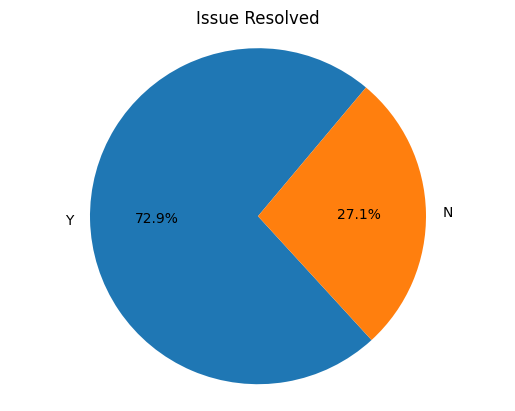

In [127]:
import matplotlib.pyplot as plt

res_counts = df['Resolved'].value_counts()
# Display the calls are resolved or not
print('Number of Issue Resolved Calls:', res_counts['Y'])
print('Number of Issue Not Resolved Calls:', res_counts['N'])

# Plotting the pie chart
plt.pie(res_counts, labels=res_counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Adding title
plt.title('Issue Resolved')

# Display the pie chart
plt.show()

**4. Avg answer Speed**

In [128]:
# Count Speed of answer
ans_speed = df['Speed of answer in seconds']
avgans_speed=ans_speed.mean()
# Display average Call Speed
print('Avg Call Speed:', avgans_speed)
ans_call_sd=df[df['Answered (Y/N)'] == 'Y'].groupby('Speed of answer in seconds')['Answered (Y/N)'].count()
unans_call_sd=df[df['Answered (Y/N)'] == 'N'].groupby('Speed of answer in seconds')['Answered (Y/N)'].count()
print('Avg answered Call Speed:',ans_call_sd.mean())
print('Avg unanswered Call Speed:',unans_call_sd.mean())

Avg Call Speed: 67.52072027627035
Avg answered Call Speed: 34.94827586206897
Avg unanswered Call Speed: nan


**5. Avg answer call duration**

In [129]:
from datetime import datetime, timedelta
#count call duration for answered calls
time_string = df[df['Answered (Y/N)'] == 'Y']['AvgTalkDuration']

time_values = time_string
time_in_seconds=[]
for time_value in time_values:
    # Parse the time value into a timedelta object
    time_delta = datetime.strptime(time_value, "%H:%M:%S") - datetime.strptime("00:00:00", "%H:%M:%S")

    # Convert timedelta to seconds (float)
    time_in_seconds.append(time_delta.total_seconds())

# Perform your desired operations with the time in seconds
print(time_in_seconds)


[242.0, 60.0, 227.0, 326.0, 91.0, 194.0, 79.0, 293.0, 208.0, 262.0, 53.0, 205.0, 297.0, 152.0, 56.0, 326.0, 59.0, 380.0, 75.0, 337.0, 229.0, 391.0, 267.0, 220.0, 150.0, 74.0, 389.0, 353.0, 261.0, 353.0, 70.0, 209.0, 100.0, 228.0, 375.0, 328.0, 317.0, 346.0, 131.0, 365.0, 345.0, 54.0, 268.0, 418.0, 48.0, 41.0, 269.0, 176.0, 396.0, 64.0, 150.0, 332.0, 45.0, 213.0, 271.0, 239.0, 81.0, 80.0, 121.0, 411.0, 141.0, 200.0, 290.0, 416.0, 145.0, 283.0, 91.0, 192.0, 94.0, 150.0, 243.0, 109.0, 252.0, 99.0, 153.0, 382.0, 160.0, 180.0, 413.0, 168.0, 330.0, 159.0, 325.0, 36.0, 405.0, 83.0, 79.0, 52.0, 302.0, 374.0, 125.0, 405.0, 191.0, 45.0, 52.0, 180.0, 120.0, 350.0, 276.0, 150.0, 269.0, 415.0, 116.0, 191.0, 169.0, 121.0, 59.0, 56.0, 76.0, 202.0, 251.0, 392.0, 177.0, 140.0, 131.0, 107.0, 324.0, 413.0, 284.0, 365.0, 70.0, 195.0, 65.0, 308.0, 378.0, 300.0, 372.0, 118.0, 234.0, 404.0, 77.0, 345.0, 289.0, 83.0, 251.0, 363.0, 346.0, 62.0, 233.0, 215.0, 102.0, 342.0, 418.0, 375.0, 252.0, 282.0, 364.0, 222

In [130]:
import numpy as np, statistics
avgans_dur=statistics.mean(time_in_seconds)
# Display Avg answered Call Duration
print('Avg answered Call Duration (Seconds):', avgans_dur)


Avg answered Call Duration (Seconds): 224.92279230389738


**6. Overall customer certification**

In [131]:
# Count Overall customer certification
cs_rat = df['Satisfaction rating']
cs_ratings=cs_rat.mean()
# Display the avg customer certification
print('Overall customer certification:', cs_ratings)


Overall customer certification: 3.4035520473606313


**7. Count of call by agent**

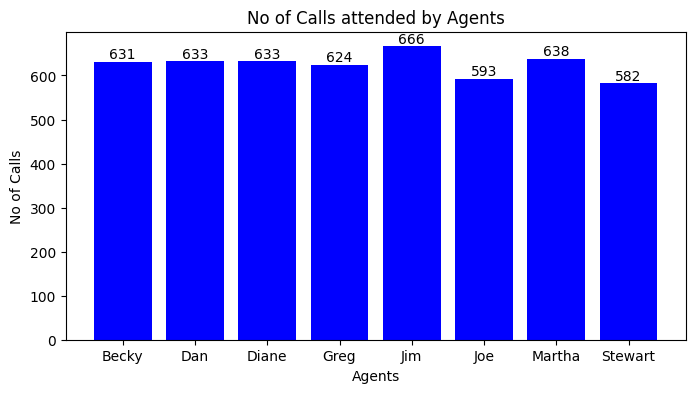

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Agent' and count the unique Call Id
Agent_counts = df.groupby('Agent')['Call Id'].nunique()
# Set the size of the figure
plt.figure(figsize=(8, 4))

# Plotting the bar chart
bars = plt.bar(Agent_counts.index, Agent_counts.values, color='Blue')
# Adding labels and title
plt.xlabel('Agents')
plt.ylabel('No of Calls')
plt.title('No of Calls attended by Agents')
# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the bar chart
plt.show()

**8. Count of calls by Topic**

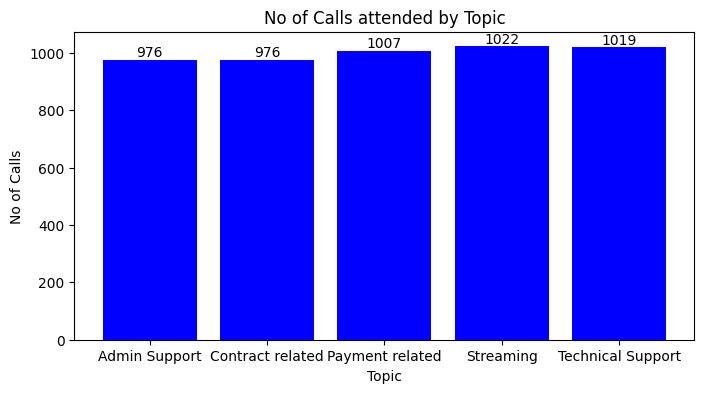

In [133]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'Topic' and count the unique Call Id
Topic_counts = df.groupby('Topic')['Call Id'].nunique()
# Set the size of the figure
plt.figure(figsize=(8, 4))

# Plotting the bar chart
bars = plt.bar(Topic_counts.index, Topic_counts.values, color='Blue')
# Adding labels and title
plt.xlabel('Topic')
plt.ylabel('No of Calls')
plt.title('No of Calls attended by Topic')
# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the bar chart
plt.show()

**9. Call distribution (Y/N)**

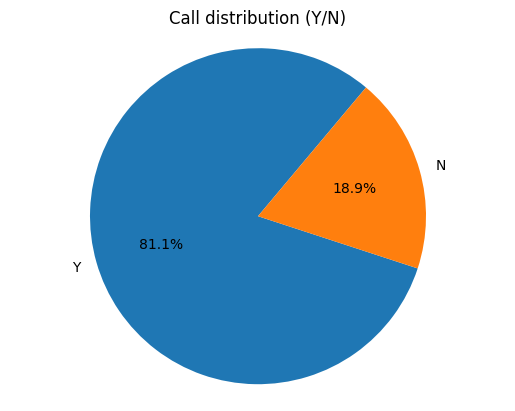

In [134]:
import matplotlib.pyplot as plt

#count answered calls
anscall_counts = df['Answered (Y/N)'].value_counts()

# Plotting the pie chart
plt.pie(anscall_counts, labels=anscall_counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Adding title
plt.title('Call distribution (Y/N)')

# Display the pie chart
plt.show()

**10.Most issue resolved by employee**

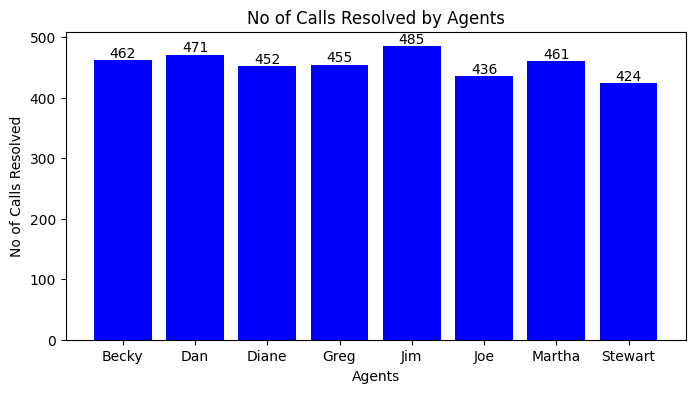

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each resolved calls
res_counts = df['Resolved'].value_counts()

# Group by 'Agent' and count the resolved call
Agent_res = df[df['Resolved'] == 'Y'].groupby('Agent')['Resolved'].count()
# Set the size of the figure
plt.figure(figsize=(8, 4))

# Plotting the bar chart
bars = plt.bar(Agent_res.index, Agent_res.values, color='Blue')
# Adding labels and title
plt.xlabel('Agents')
plt.ylabel('No of Calls Resolved')
plt.title('No of Calls Resolved by Agents')
# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the bar chart
plt.show()

**11.Most rated employee**

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Satisfaction rating
ratings_counts = df['Satisfaction rating'].value_counts()

# Group by 'Agent' and count the Satisfaction rating
Agent_rate = df.groupby('Agent')['Satisfaction rating'].mean()

print(Agent_rate)
# Agent_rate is a Pandas Series
max_rate_index = Agent_rate.idxmax()
max_rate_value = Agent_rate[max_rate_index]

print(f"The maximum rate is {max_rate_value} for the agent: {max_rate_index}")


Agent
Becky      3.371373
Dan        3.447419
Diane      3.405190
Greg       3.404382
Jim        3.393657
Joe        3.330579
Martha     3.470817
Stewart    3.400419
Name: Satisfaction rating, dtype: float64
The maximum rate is 3.470817120622568 for the agent: Martha


**12.Employee who has missed more number of calls**

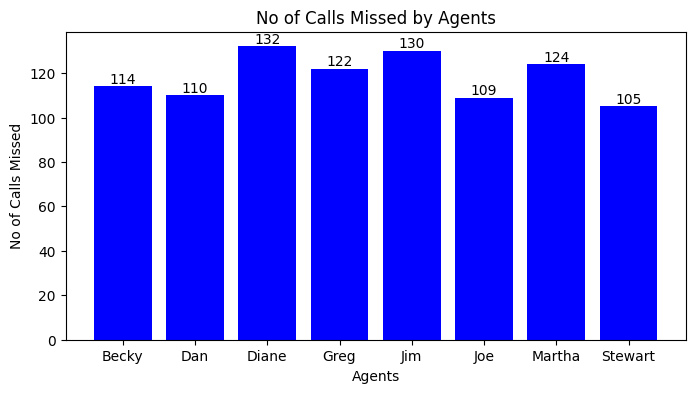

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Agent' and count the missed calls by agents
Agent_misscall = df[df['Answered (Y/N)'] == 'N'].groupby('Agent')['Answered (Y/N)'].count()
# Set the size of the figure
plt.figure(figsize=(8, 4))

# Plotting the bar chart
bars = plt.bar(Agent_misscall.index, Agent_misscall.values, color='Blue')
# Adding labels and title
plt.xlabel('Agents')
plt.ylabel('No of Calls Missed')
plt.title('No of Calls Missed by Agents')
# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the bar chart
plt.show()

In [138]:
max_misscall_index = Agent_misscall.idxmax()
max_misscall_value = Agent_misscall[max_misscall_index]

print(f"The maximum missed call is {max_misscall_value} for the agent: {max_misscall_index}")


The maximum missed call is 132 for the agent: Diane
